In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import reduce


In [94]:
df = pd.read_csv(os.path.join('..', 'data.csv'), sep=',')

In [95]:
df.head()

,id,name,link,image,inputR1,inputR2,inputR3,inputT1,inputT2,inputT3,outputR1,outputR2,outputR3,outputT1,outputT2,outputT3,comments,created,transmission
0,3,Bevel gears,https://grabcad.com/library/parametric-bevel-g...,img/0002-bevelgears.jpg,1,0,0,0,0,0,0,1,0,0,0,0,NaN,2018-05-08 07:25:40.627309,10
1,4,Belt drive (quarter turn),https://www.youtube.com/watch?v=RpVSn_ZZCOI,img/0003-beltdrive-quarterturn.jpg,1,0,0,0,0,0,0,1,0,0,0,0,NaN,2018-05-08 07:26:13.541636,1
2,6,Two stage gearbox,https://grabcad.com/library/2-stage-gear-box,img/0005-twostage-gearbox.jpg,1,0,0,0,0,0,1,0,0,0,0,0,NaN,2018-05-08 07:27:38.854208,20
3,7,Cam follower,https://grabcad.com/library/cam-and-follower-13,img/0010-cam-follower.jpg,1,0,0,0,0,0,0,0,0,1,0,0,NaN,2018-05-08 07:28:21.610800,1
4,8,Belt drive (flat),http://507movements.com/mm_001.html,img/0014-beltdrive-flat.jpg,1,0,0,0,0,0,1,0,0,0,0,0,NaN,2018-05-08 07:28:57.759737,1


In [96]:
inputRotations = ['inputR1', 'inputR2', 'inputR3']
inputTranslations = ['inputT1', 'inputT2', 'inputT3']
inputs = inputRotations + inputTranslations
outputRotations = ['outputR1', 'outputR2', 'outputR3']
outputTranslations = ['outputT1', 'outputR2', 'outputT3']
outputs = outputRotations + outputTranslations

In [97]:
inRot = [df[col] for col in inputRotations]
inTrans = [df[col] for col in inputTranslations]
inAny = inRot + inTrans
outRot = [df[col] for col in outputRotations]
outTrans = [df[col] for col in outputTranslations]
outAny = outRot + outTrans

# Total Number of Output Rotations depending on ...

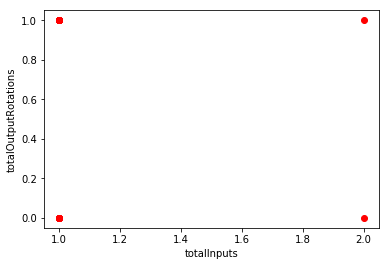

In [98]:
totalInputs = reduce((lambda x, y: x + y), inAny)
totalOutputRotations = reduce((lambda x, y: x + y), outRot)
plt.plot(totalInputs, totalOutputRotations, 'ro')
plt.xlabel('totalInputs')
plt.ylabel('totalOutputRotations')
plt.show()

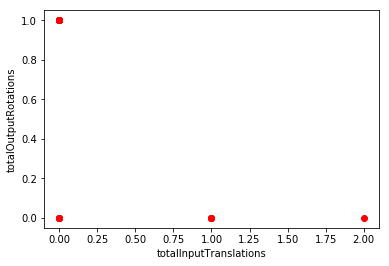

In [99]:
totalInputTranslations = reduce((lambda x, y: x + y), inTrans)
totalOutputRotations = reduce((lambda x, y: x + y), outRot)
plt.plot(totalInputTranslations, totalOutputRotations, 'ro')
plt.xlabel('totalInputTranslations')
plt.ylabel('totalOutputRotations')
plt.show()

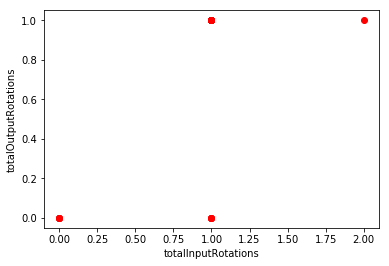

In [100]:
totalInputRotations = reduce((lambda x, y: x + y), inRot)
totalOutputRotations = reduce((lambda x, y: x + y), outRot)
plt.plot(totalInputRotations, totalOutputRotations, 'ro')
plt.xlabel('totalInputRotations')
plt.ylabel('totalOutputRotations')
plt.show()

# Total Number of Output Translations depending on ...

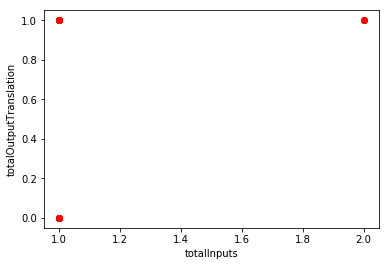

In [101]:
totalInputs = reduce((lambda x, y: x + y), inAny)
totalOutputTranslations = reduce((lambda x, y: x + y), outTrans)
plt.plot(totalInputs, totalOutputTranslations, 'ro')
plt.xlabel('totalInputs')
plt.ylabel('totalOutputTranslation')
plt.show()

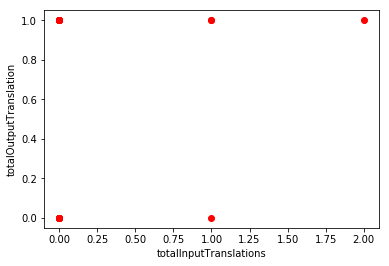

In [102]:
totalInputTranslations = reduce((lambda x, y: x + y), inTrans)
totalOutputTranslations = reduce((lambda x, y: x + y), outTrans)
plt.plot(totalInputTranslations, totalOutputTranslations, 'ro')
plt.xlabel('totalInputTranslations')
plt.ylabel('totalOutputTranslation')
plt.show()

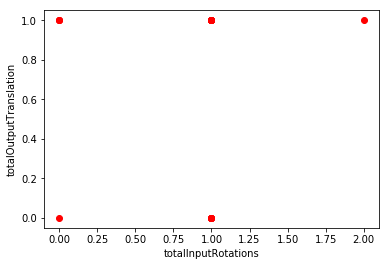

In [103]:
totalInputRotations = reduce((lambda x, y: x + y), inRot)
totalOutputTranslations = reduce((lambda x, y: x + y), outTrans)
plt.plot(totalInputRotations, totalOutputTranslations, 'ro')
plt.xlabel('totalInputRotations')
plt.ylabel('totalOutputTranslation')
plt.show()

# Total Number of Outputs depending on ...

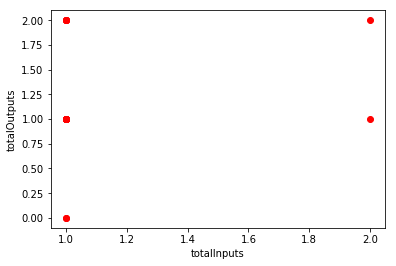

In [104]:
totalInputs = reduce((lambda x, y: x + y), inAny)
totalOutputs = reduce((lambda x, y: x + y), outAny)
plt.plot(totalInputs, totalOutputs, 'ro')
plt.xlabel('totalInputs')
plt.ylabel('totalOutputs')
plt.show()

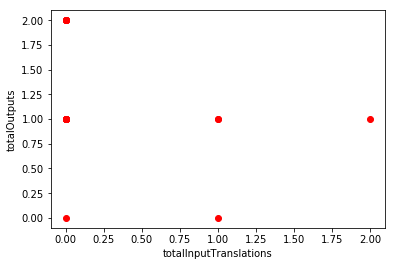

In [105]:
totalInputTranslations = reduce((lambda x, y: x + y), inTrans)
totalOutputs = reduce((lambda x, y: x + y), outAny)
plt.plot(totalInputTranslations, totalOutputs, 'ro')
plt.xlabel('totalInputTranslations')
plt.ylabel('totalOutputs')
plt.show()

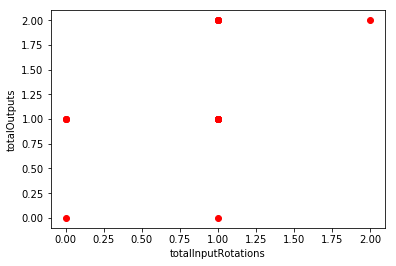

In [106]:
totalInputRotations = reduce((lambda x, y: x + y), inRot)
totalOutputs = reduce((lambda x, y: x + y), outAny)
plt.plot(totalInputRotations, totalOutputs, 'ro')
plt.xlabel('totalInputRotations')
plt.ylabel('totalOutputs')
plt.show()

# Misc.

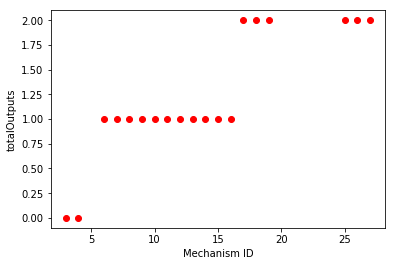

In [107]:
totalOutputs = reduce((lambda x, y: x + y), outAny).sort_values()
plt.plot(df['id'], totalOutputs, 'ro')
plt.xlabel('Mechanism ID')
plt.ylabel('totalOutputs')
plt.show()

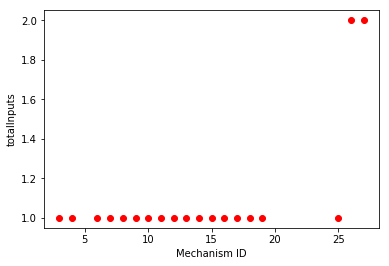

In [108]:
totalInputs = reduce((lambda x, y: x + y), inAny).sort_values()
plt.plot(df['id'], totalInputs, 'ro')
plt.xlabel('Mechanism ID')
plt.ylabel('totalInputs')
plt.show()

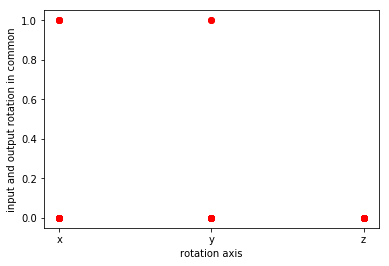

In [109]:
#inRot
commonRotations = [a * b for a,b in zip(inRot, outRot)]
commonRotations

#commonRotations

plt.plot(["x", "y", "z"], commonRotations, 'ro')
plt.xlabel('rotation axis')
plt.ylabel('input and output rotation in common')
plt.show()

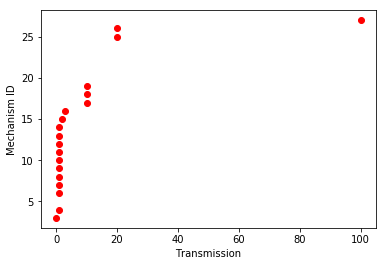

In [110]:
plt.plot(df['transmission'].sort_values(), df['id'], 'ro')
plt.xlabel('Transmission')
plt.ylabel('Mechanism ID')
plt.show()

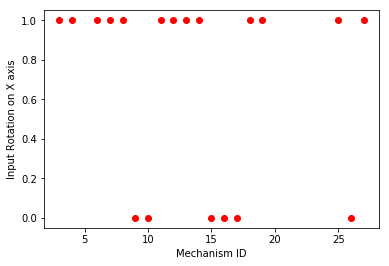

In [111]:
plt.plot(df['id'], df['inputR1'], 'ro')
plt.xlabel('Mechanism ID')
plt.ylabel('Input Rotation on X axis')
plt.show()

# Current Dev